In [1]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import os

In [2]:
# Downloading S&P 500 data
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0, parse_dates=True)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0


In [4]:
# Preparing the data
sp500 = sp500['Close']
sp500.dropna(inplace=True)

In [5]:
# Setting the frequency for the date index
sp500 = sp500.asfreq('B')  # 'B' stands for business day frequency
sp500.ffill(inplace=True)  # Forward fill NaN values

In [6]:
# Splitting the dataset into train and test
split_point = len(sp500) - 100
train, test = sp500[0:split_point], sp500[split_point:]

In [7]:
# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [8]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))

In [10]:
# Use updated method for forward filling NaN values in predictions
predictions.ffill(inplace=True)

In [11]:
# Evaluate predictions
rmse = sqrt(mean_squared_error(test, predictions))

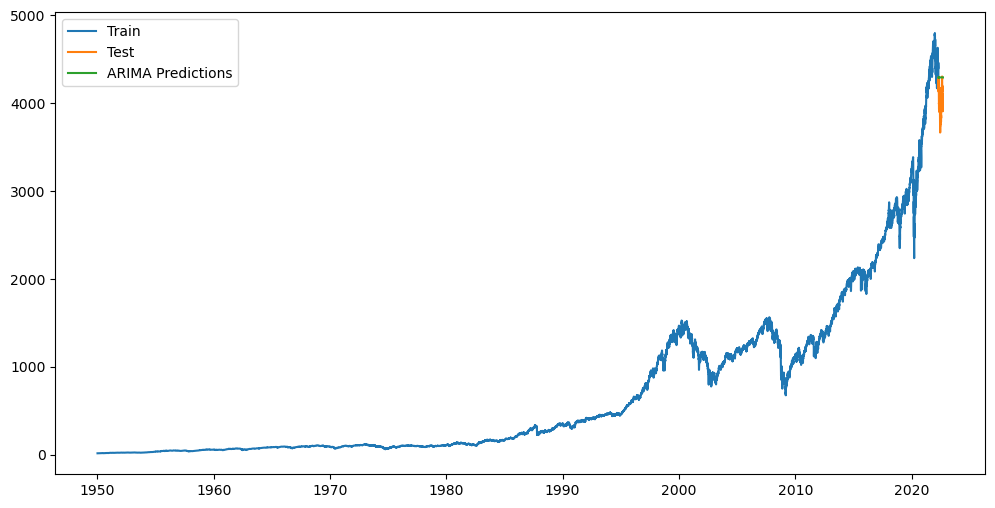

Test RMSE: 326.585


In [17]:
# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='ARIMA Predictions')
plt.legend()
plt.show()

print('Test RMSE: %.3f' % rmse)

In [24]:
import pandas as pd

# Replace 'sp500.csv' with the correct path if your file is in a different directory
sp500_df = pd.read_csv('sp500.csv')

# Rest of your code to process the dataframe...


# Load the CSV file into a DataFrame
sp500_df = pd.read_csv('sp500.csv')

# Convert the 'Date' column to a datetime object and set as index
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.set_index('Date', inplace=True)

# Generate the target variable 'Target'
sp500_df['Target'] = (sp500_df['Close'].shift(-1) > sp500_df['Close']).astype(int)

# Now sp500_df is ready with the 'Target' column for classification


In [25]:
# Display the first few rows of the modified DataFrame
sp500_df.head()  # This line will cause the first few rows to be displayed

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0,1
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0,1
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0,1
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0,1
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0,0


In [26]:
# Since we need to display the latest year data, we'll sort the DataFrame by the index in descending order
# and then display the first few rows to show the most recent data.

# Sort the DataFrame by the index in descending order
sp500_df.sort_index(ascending=False, inplace=True)

# Display the first few rows of the most recent data in the DataFrame
sp500_df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2022-09-12,4083.669922,4119.279785,4083.669922,4107.279785,1602969000,0,0,0
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,0,0,0,1
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0,1
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0,1
